In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta as ta
import yfinance as yf
import itertools

In [2]:
#Get the SP500 value from yfinance for the whole history
ticker = '^GSPC'
data_stock = yf.Ticker(ticker).history(period='max')

In [3]:
data_stock = data_stock.loc[:, data_stock.columns != 'Dividends']
data_stock = data_stock.loc[:, data_stock.columns != 'Stock Splits']
data_stock

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2022-04-28,4222.580078,4308.450195,4188.629883,4287.500000,3969440000
2022-04-29,4253.750000,4269.680176,4124.279785,4131.930176,3943480000
2022-05-02,4130.609863,4169.810059,4062.510010,4155.379883,4474060000


In [52]:
from ta.trend import ADXIndicator
from ta.momentum import RSIIndicator
from ta.trend import MACD

In [53]:
indicator_rsi = RSIIndicator(close=data_stock["Close"], window=14)
indicator_adx = ADXIndicator(high=data_stock["High"], low=data_stock["Low"] ,close=data_stock["Close"], window=14)
indicator_macd = MACD(close=data_stock["Close"])

In [54]:
#Calculating rsi, adx and macd indicator value
data_stock['rsi'] = indicator_rsi.rsi()
data_stock['adx_pos'] = indicator_adx.adx_pos()
data_stock['adx_neg'] = indicator_adx.adx_neg()
data_stock['macd'] = indicator_macd.macd_diff()

In [55]:
data_stock = data_stock.dropna()
data_stock

,Open,High,Low,Close,Volume,rsi,adx_pos,adx_neg,macd
Date,,,,,,,,,
1950-02-20,17.200001,17.200001,17.200001,17.200001,1420000,58.770959,59.259816,40.740184,-0.019255
1950-02-21,17.170000,17.170000,17.170000,17.170000,1260000,56.907354,57.589327,42.410673,-0.017082
1950-02-23,17.209999,17.209999,17.209999,17.209999,1310000,58.783907,59.239121,40.760879,-0.013124
1950-02-24,17.280001,17.280001,17.280001,17.280001,1710000,61.910066,62.023408,37.976592,-0.006311
1950-02-27,17.280001,17.280001,17.280001,17.280001,1410000,61.910066,62.023408,37.976592,-0.002519
...,...,...,...,...,...,...,...,...,...
2022-04-29,4253.750000,4269.680176,4124.279785,4131.930176,3943480000,34.976293,15.552972,31.762781,-31.436223
2022-05-02,4130.609863,4169.810059,4062.510010,4155.379883,4474060000,36.871049,14.237732,33.944949,-30.438403
2022-05-03,4159.779785,4200.100098,4147.080078,4175.479980,3877530000,38.524640,16.084759,32.483192,-26.556305


In [56]:
data_stock.to_csv('data_stock_test.csv')

In [8]:
data_stock_with_gdp = pd.read_csv('data_stock.csv')

In [9]:
#Add in GDP_indicator values
for i in range(len(data_stock_with_gdp)):
    if np.isnan(data_stock_with_gdp['gdp_indicator'][i]) == False:
        pass
    elif np.isnan(data_stock_with_gdp['gdp_indicator'][i]) == True:
        data_stock_with_gdp['gdp_indicator'][i] = data_stock_with_gdp['gdp_indicator'][i-1]

C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/4292745605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_with_gdp['gdp_indicator'][i] = data_stock_with_gdp['gdp_indicator'][i-1]


In [10]:
data_stock_with_gdp.set_index('Date', inplace=True)
data_stock_with_gdp

,Open,High,Low,Close,Volume,rsi,adx_pos,adx_neg,macd,gdp_indicator
Date,,,,,,,,,,
3/31/1993,451.970001,454.880005,451.670013,451.670013,279190000,56.303068,23.675127,21.170242,-0.290092,1.0
4/1/1993,451.670013,452.630005,449.600006,450.299988,234530000,53.525428,22.272311,23.963824,-0.327806,1.0
4/2/1993,450.279999,450.279999,440.709992,441.390015,323330000,39.780405,18.529965,35.513499,-0.920456,1.0
4/5/1993,441.420013,442.429993,440.529999,442.290008,296080000,41.416866,17.888645,34.612252,-1.201715,1.0
4/6/1993,442.290008,443.380005,439.480011,441.160004,293680000,39.948958,16.617318,34.065772,-1.399866,1.0
...,...,...,...,...,...,...,...,...,...,...
12/23/2009,1118.839966,1121.579956,1116.000000,1120.589966,3166870000,60.169119,28.525466,21.385695,0.494620,0.0
12/24/2009,1121.079956,1126.479980,1121.079956,1126.479980,1267710000,62.555503,30.510573,20.609117,1.121634,0.0
12/28/2009,1127.530029,1130.380005,1123.510010,1127.780029,2716400000,63.081273,31.656043,19.710085,1.480163,0.0


# Training Set

Run through the training set data between 1993 and 2009 to test different combination of weights for indicators and buy and sell thresholds to get the highest return

In [15]:
data_stock = data_stock_with_gdp
data_stock

,Open,High,Low,Close,Volume,rsi,adx_pos,adx_neg,macd,gdp_indicator
Date,,,,,,,,,,
3/31/1993,451.970001,454.880005,451.670013,451.670013,279190000,56.303068,23.675127,21.170242,-0.290092,1.0
4/1/1993,451.670013,452.630005,449.600006,450.299988,234530000,53.525428,22.272311,23.963824,-0.327806,1.0
4/2/1993,450.279999,450.279999,440.709992,441.390015,323330000,39.780405,18.529965,35.513499,-0.920456,1.0
4/5/1993,441.420013,442.429993,440.529999,442.290008,296080000,41.416866,17.888645,34.612252,-1.201715,1.0
4/6/1993,442.290008,443.380005,439.480011,441.160004,293680000,39.948958,16.617318,34.065772,-1.399866,1.0
...,...,...,...,...,...,...,...,...,...,...
12/23/2009,1118.839966,1121.579956,1116.000000,1120.589966,3166870000,60.169119,28.525466,21.385695,0.494620,0.0
12/24/2009,1121.079956,1126.479980,1121.079956,1126.479980,1267710000,62.555503,30.510573,20.609117,1.121634,0.0
12/28/2009,1127.530029,1130.380005,1123.510010,1127.780029,2716400000,63.081273,31.656043,19.710085,1.480163,0.0


In [37]:
#Get all the possible combination of values for weights
from itertools import product
numlist = [1,2,3]
weights = []
for i in itertools.product(numlist, repeat = 4):
    weights.append(i)

In [41]:
#Get all the possible combination of values for buy/sell threshold
from itertools import product
numlist = [5,6,7,8,9,10,11]
thresholds = []
for i in itertools.product(numlist, repeat = 2):
    if i[0] >= i[1]:
        threshold = i
    else:
        pass
    thresholds.append(threshold)

In [42]:
thresholds = [i for n, i in enumerate(thresholds) if i not in thresholds[:n]]

In [43]:
profit_percentages = []
weights_rsi = []
weights_adx = []
weights_macd = []
weights_gdp = []
buy_thresholds = []
sell_thresholds = []
for weight in weights:
    a = weight[0]
    b = weight[1]
    c = weight[2]
    d = weight[3]
    for threshold in thresholds:
        buy_threshold = threshold[0]
        sell_threshold = threshold[1]
        if sum(weight) < buy_threshold:
            profit_percentage = 0
            profit_percentages.append(profit_percentage)
            weights_rsi.append(a)
            weights_adx.append(b)
            weights_macd.append(c)
            weights_gdp.append(d)
            buy_thresholds.append(buy_threshold)
            sell_thresholds.append(sell_threshold)
        elif sum(weight) >= buy_threshold:
            #rsi
            data_stock['rsi_signal'] = 0
            overbought = 0
            oversold = 0
            for i in range(len(data_stock)):
                if data_stock['rsi'][i] >=50 and data_stock['rsi'][i] <= 75 and overbought == 0 and oversold == 0:
                    data_stock['rsi_signal'][i] = a
                    overbought == 0 
                    oversold == 0
                elif data_stock['rsi'][i] > 75:
                    data_stock['rsi_signal'][i] = 0
                    overbought == a
                    oversold == 0
                elif data_stock['rsi'][i] >= 48 and data_stock['rsi'][i] <= 52 and overbought == 1 and oversold == 0:
                    data_stock['rsi_signal'][i] = a
                    overbought == 0
                    oversold == 0  
                elif data_stock['rsi'][i] < 48 and data_stock['rsi'][i] >= 25 and overbought == 0 and oversold == 0:
                    data_stock['rsi_signal'][i] = 0
                    overbought == 0
                    oversold == 0  
                elif data_stock['rsi'][i] < 25:
                    data_stock['rsi_signal'][i] = a
                    overbought == 0
                    oversold == 1
                elif data_stock['rsi'][i] >= 48 and data_stock['rsi'][i] <= 52 and oversold == 1 and overbought == 0:
                    data_stock['rsi_signal'][i] = 0
                    overbought == 0
                    oversold == 0      
                else:
                    data_stock['rsi_signal'][i] = 0

            #other indicators
            data_stock['adx_signal'] = 0
            data_stock['macd_signal'] = 0
            data_stock['gdp_signal'] = 0
            data_stock['all_signal'] = 0
            for i in range(len(data_stock)):
                if data_stock['adx_pos'][i] >= data_stock['adx_neg'][i]:
                    data_stock['adx_signal'][i] = b
                elif data_stock['adx_pos'][i] < data_stock['adx_neg'][i]:
                    data_stock['adx_signal'][i] = 0
                if data_stock['macd'][i] >= 0:
                    data_stock['macd_signal'][i] = c
                elif data_stock['macd'][i] <0:
                    data_stock['macd_signal'][i] = 0   
                if data_stock['gdp_indicator'][i] >= 3:
                    data_stock['gdp_signal'][i] = d 
                elif data_stock['gdp_indicator'][i] <3:
                    data_stock['gdp_signal'][i] = 0                
                data_stock['all_signal'][i] = data_stock['rsi_signal'][i]+data_stock['adx_signal'][i]+data_stock['macd_signal'][i]+data_stock['gdp_signal'][i]

            #calculate profit
            data_stock_new = data_stock[:]
            buy_price, sell_price, indicator_signal = implement_strategy(data_stock_new['Close'], data_stock_new['all_signal'] , buy_threshold, sell_threshold)

            position = []
            for i in range(len(indicator_signal)):
                if indicator_signal[i] > 1:
                    position.append(0)
                else:
                    position.append(1)

            for i in range(len(data_stock_new['Close'])):
                if indicator_signal[i] == 1:
                    position[i] = 1
                elif indicator_signal[i] == -1:
                    position[i] = 0
                else:
                    position[i] = position[i-1]

            indicators = data_stock_new['all_signal']
            close_price = data_stock_new['Close']
            indicator_signal = pd.DataFrame(indicator_signal).rename(columns = {0:'indicator_signal'}).set_index(data_stock_new.index)
            position = pd.DataFrame(position).rename(columns = {0:'indicator_position'}).set_index(data_stock_new.index)

            frames = [close_price, indicators, indicator_signal, position]
            strategy = pd.concat(frames, join = 'inner', axis = 1)

            sp500_ret = pd.DataFrame(np.diff(data_stock_new['Close'])).rename(columns = {0:'returns'})
            all_strategy_ret = []

            for i in range(len(sp500_ret)):
                returns = sp500_ret['returns'][i]*strategy['indicator_position'][i]
                all_strategy_ret.append(returns)

            all_strategy_ret_df = pd.DataFrame(all_strategy_ret).rename(columns = {0:'indicator_returns'})
            investment_value = 100000
            number_of_stocks = floor(investment_value/data_stock_new['Close'][-1])
            all_investment_ret = []

            for i in range(len(all_strategy_ret_df['indicator_returns'])):
                returns = number_of_stocks*all_strategy_ret_df['indicator_returns'][i]
                all_investment_ret.append(returns)

            all_investment_ret_df = pd.DataFrame(all_investment_ret).rename(columns = {0:'investment_returns'})
            total_investment_ret = round(sum(all_investment_ret_df['investment_returns']), 2)
            profit_percentage = floor((total_investment_ret/investment_value)*100)
            profit_percentages.append(profit_percentage)
            weights_rsi.append(a)
            weights_adx.append(b)
            weights_macd.append(c)
            weights_gdp.append(d)
            buy_thresholds.append(buy_threshold)
            sell_thresholds.append(sell_threshold)

C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/2572834004.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock['rsi_signal'][i] = a
C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/2572834004.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock['rsi_signal'][i] = 0
C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/2572834004.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock['rsi_signal'][i] = 0
C

In [44]:
loc_best = profit_percentages.index(max(profit_percentages))

In [ ]:
#Return the best combination of weights and thresholds
print(weights_rsi[loc_best])
print(weights_adx[loc_best])
print(weights_macd[loc_best])
print(weights_gdp[loc_best])
print(buy_thresholds[loc_best])
print(sell_thresholds[loc_best])
print(profit_percentages[loc_best])

# Testing Set

Once we get the most optimized combination of weights and threshold from the training set. We apply this combination to the testing set between 2011-2022 to get our return 

In [59]:
data_stock_with_gdp_test = pd.read_csv('data_stock_test.csv')

In [61]:
for i in range(len(data_stock_with_gdp_test)):
    if np.isnan(data_stock_with_gdp_test['gdp_indicator'][i]) == False:
        pass
    elif np.isnan(data_stock_with_gdp_test['gdp_indicator'][i]) == True:
        data_stock_with_gdp_test['gdp_indicator'][i] = data_stock_with_gdp_test['gdp_indicator'][i-1]

C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/3858622549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_with_gdp_test['gdp_indicator'][i] = data_stock_with_gdp_test['gdp_indicator'][i-1]


In [63]:
data_stock_with_gdp_test.set_index('Date', inplace=True)
data_stock_with_gdp_test

,Open,High,Low,Close,Volume,rsi,adx_pos,adx_neg,macd,gdp_indicator
Date,,,,,,,,,,
2/23/2011,1315.439941,1317.910034,1299.550049,1307.400024,1330340000,49.448013,24.896299,32.049669,-2.510043,2.0
2/24/2011,1307.089966,1310.910034,1294.260010,1306.099976,1222900000,48.774498,22.543924,32.023429,-3.755265,2.0
2/25/2011,1307.339966,1320.609985,1307.339966,1319.880005,3836030000,55.667329,26.152819,29.415005,-3.587575,2.0
2/28/2011,1321.609985,1329.380005,1320.550049,1327.219971,1252850000,58.844006,29.746298,27.817406,-2.945902,2.0
3/1/2011,1328.640015,1332.089966,1306.140015,1306.329956,1180420000,48.247686,25.648437,31.635117,-3.835640,2.0
...,...,...,...,...,...,...,...,...,...,...
4/29/2022,4253.750000,4269.680176,4124.279785,4131.930176,3943480000,34.976293,15.552972,31.762781,-31.436223,1.0
5/2/2022,4130.609863,4169.810059,4062.510010,4155.379883,4474060000,36.871049,14.237732,33.944949,-30.438403,1.0
5/3/2022,4159.779785,4200.100098,4147.080078,4175.479980,3877530000,38.524640,16.084759,32.483192,-26.556305,1.0


In [64]:
#return buy and sell signal for rsi
data_stock_with_gdp_test['rsi_signal'] = 0
overbought = 0
oversold = 0
a = 1
for i in range(len(data_stock_with_gdp_test)):
    if data_stock_with_gdp_test['rsi'][i] >=50 and data_stock_with_gdp_test['rsi'][i] <= 75 and overbought == 0 and oversold == 0:
        data_stock_with_gdp_test['rsi_signal'][i] = a
        overbought == 0 
        oversold == 0
    elif data_stock_with_gdp_test['rsi'][i] > 75:
        data_stock_with_gdp_test['rsi_signal'][i] = 0
        overbought == a
        oversold == 0
    elif data_stock_with_gdp_test['rsi'][i] >= 48 and data_stock_with_gdp_test['rsi'][i] <= 52 and overbought == 1 and oversold == 0:
        data_stock_with_gdp_test['rsi_signal'][i] = a
        overbought == 0
        oversold == 0  
    elif data_stock_with_gdp_test['rsi'][i] < 48 and data_stock_with_gdp_test['rsi'][i] >= 25 and overbought == 0 and oversold == 0:
        data_stock_with_gdp_test['rsi_signal'][i] = 0
        overbought == 0
        oversold == 0  
    elif data_stock_with_gdp_test['rsi'][i] < 25:
        data_stock_with_gdp_test['rsi_signal'][i] = a
        overbought == 0
        oversold == 1
    elif data_stock_with_gdp_test['rsi'][i] >= 48 and data_stock_with_gdp_test['rsi'][i] <= 52 and oversold == 1 and overbought == 0:
        data_stock_with_gdp_test['rsi_signal'][i] = 0
        overbought == 0
        oversold == 0      
    else:
        data_stock_with_gdp_test['rsi_signal'][i] = 0

C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/3508489733.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_with_gdp_test['rsi_signal'][i] = 0
C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/3508489733.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_with_gdp_test['rsi_signal'][i] = a
C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/3508489733.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s

In [66]:
#return buy and sell signal for adx, macd and gdp
data_stock_with_gdp_test['adx_signal'] = 0
data_stock_with_gdp_test['macd_signal'] = 0
data_stock_with_gdp_test['gdp_signal'] = 0
data_stock_with_gdp_test['all_signal'] = 0
b = 1
c = 2
d = 3
for i in range(len(data_stock_with_gdp_test)):
    if data_stock_with_gdp_test['adx_pos'][i] >= data_stock_with_gdp_test['adx_neg'][i]:
        data_stock_with_gdp_test['adx_signal'][i] = b
    elif data_stock_with_gdp_test['adx_pos'][i] < data_stock_with_gdp_test['adx_neg'][i]:
        data_stock_with_gdp_test['adx_signal'][i] = 0
    if data_stock_with_gdp_test['macd'][i] >= 0:
        data_stock_with_gdp_test['macd_signal'][i] = c
    elif data_stock_with_gdp_test['macd'][i] <0:
        data_stock_with_gdp_test['macd_signal'][i] = 0      
    if data_stock_with_gdp_test['gdp_indicator'][i] >= 3:
        data_stock_with_gdp_test['gdp_signal'][i] = d 
    elif data_stock_with_gdp_test['gdp_indicator'][i] <3:
        data_stock_with_gdp_test['gdp_signal'][i] = 0                
    data_stock_with_gdp_test['all_signal'][i] = data_stock_with_gdp_test['rsi_signal'][i]+data_stock_with_gdp_test['adx_signal'][i]+data_stock_with_gdp_test['macd_signal'][i]+data_stock_with_gdp_test['gdp_signal'][i]


C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/2583855.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_with_gdp_test['adx_signal'][i] = 0
C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/2583855.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_with_gdp_test['macd_signal'][i] = 0
C:\Users\VkVkV\AppData\Local\Temp/ipykernel_74476/2583855.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_wi

In [67]:
#return buy and sell signal for the combined indicator, the buy and sell prices
def implement_strategy(prices, indicators, buy_value, sell_value):    
    buy_price = []
    sell_price = []
    indicator_signal = []
    signal = 0

    for i in range(len(indicators)):
        if indicators[i] >= buy_value:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                indicator_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                indicator_signal.append(0)
        elif indicators[i-1] < sell_value:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                indicator_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                indicator_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            indicator_signal.append(0)
            
    return buy_price, sell_price, indicator_signal

In [185]:
#Pick the period of time between 2011-2022 to check the performance of the trading algo
data_stock_with_gdp_test_new = data_stock_with_gdp_test[:]

In [186]:
data_stock_with_gdp_test_new

,Open,High,Low,Close,Volume,rsi,adx_pos,adx_neg,macd,gdp_indicator,rsi_signal,adx_signal,macd_signal,all_signal,gdp_signal
Date,,,,,,,,,,,,,,,
2/23/2011,1315.439941,1317.910034,1299.550049,1307.400024,1330340000,49.448013,24.896299,32.049669,-2.510043,2.0,0,0,0,0,0
2/24/2011,1307.089966,1310.910034,1294.260010,1306.099976,1222900000,48.774498,22.543924,32.023429,-3.755265,2.0,0,0,0,0,0
2/25/2011,1307.339966,1320.609985,1307.339966,1319.880005,3836030000,55.667329,26.152819,29.415005,-3.587575,2.0,1,0,0,1,0
2/28/2011,1321.609985,1329.380005,1320.550049,1327.219971,1252850000,58.844006,29.746298,27.817406,-2.945902,2.0,1,1,0,2,0
3/1/2011,1328.640015,1332.089966,1306.140015,1306.329956,1180420000,48.247686,25.648437,31.635117,-3.835640,2.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/29/2022,4253.750000,4269.680176,4124.279785,4131.930176,3943480000,34.976293,15.552972,31.762781,-31.436223,1.0,0,0,0,0,0
5/2/2022,4130.609863,4169.810059,4062.510010,4155.379883,4474060000,36.871049,14.237732,33.944949,-30.438403,1.0,0,0,0,0,0
5/3/2022,4159.779785,4200.100098,4147.080078,4175.479980,3877530000,38.524640,16.084759,32.483192,-26.556305,1.0,0,0,0,0,0


In [187]:
buy_value = 4
sell_value = 3
buy_price, sell_price, indicator_signal = implement_strategy(data_stock_with_gdp_test_new['Close'], data_stock_with_gdp_test_new['all_signal'] , buy_value, sell_value)

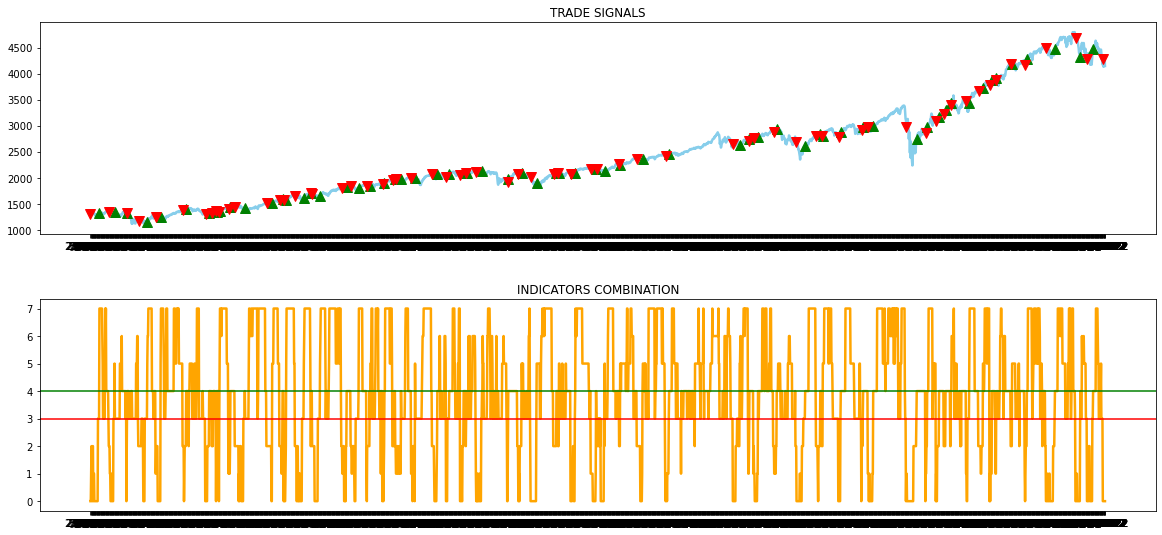

In [188]:
plt.figure(figsize = (20,10))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(data_stock_with_gdp_test_new['Close'], linewidth = 2.5, color = 'skyblue', label = 'SP500')
ax1.plot(data_stock_with_gdp_test_new.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(data_stock_with_gdp_test_new.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('TRADE SIGNALS')
ax2.plot(data_stock_with_gdp_test_new['all_signal'], color = 'orange', linewidth = 2.5)
ax2.set_title('INDICATORS COMBINATION')
ax2.axhline(y = 3, color = 'r', linestyle = '-')
ax2.axhline(y = 4, color = 'g', linestyle = '-')
plt.show()

In [189]:
#Return the portfolio position
position = []
for i in range(len(indicator_signal)):
    if indicator_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(data_stock_with_gdp_test_new['Close'])):
    if indicator_signal[i] == 1:
        position[i] = 1
    elif indicator_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
indicators = data_stock_with_gdp_test_new['all_signal']
close_price = data_stock_with_gdp_test_new['Close']
indicator_signal = pd.DataFrame(indicator_signal).rename(columns = {0:'indicator_signal'}).set_index(data_stock_with_gdp_test_new.index)
position = pd.DataFrame(position).rename(columns = {0:'indicator_position'}).set_index(data_stock_with_gdp_test_new.index)

frames = [close_price, indicators, indicator_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy.head()

,Close,all_signal,indicator_signal,indicator_position
Date,,,,
2/23/2011,1307.400024,0,-1,0
2/24/2011,1306.099976,0,0,0
2/25/2011,1319.880005,1,0,0
2/28/2011,1327.219971,2,0,0
3/1/2011,1306.329956,0,0,0


In [190]:
from math import floor
from termcolor import colored as cl 

In [191]:
#Calculate the profit and return
sp500_ret = pd.DataFrame(np.diff(data_stock_with_gdp_test_new['Close'])).rename(columns = {0:'returns'})
all_strategy_ret = []

for i in range(len(sp500_ret)):
    returns = sp500_ret['returns'][i]*strategy['indicator_position'][i]
    all_strategy_ret.append(returns)
    
all_strategy_ret_df = pd.DataFrame(all_strategy_ret).rename(columns = {0:'indicator_returns'})
investment_value = 100000
number_of_stocks = floor(investment_value/data_stock_with_gdp_test['Close'][-1])
all_investment_ret = []

for i in range(len(all_strategy_ret_df['indicator_returns'])):
    returns = number_of_stocks*all_strategy_ret_df['indicator_returns'][i]
    all_investment_ret.append(returns)

all_investment_ret_df = pd.DataFrame(all_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(all_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the strategy by investing $100k in Sp500 : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the strategy by investing $100k in Sp500 : 55354.05
Profit percentage of the strategy : 55%
